In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:19<00:00, 37.8MB/s]
100% 4.09G/4.09G [01:19<00:00, 55.2MB/s]


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [7]:
!unzip -q ChinaSet_AllFiles.zip -d chinaset

unzip:  cannot find or open ChinaSet_AllFiles.zip, ChinaSet_AllFiles.zip.zip or ChinaSet_AllFiles.zip.ZIP.


In [8]:
!unzip -q Montgomery.zip -d montset

unzip:  cannot find or open Montgomery.zip, Montgomery.zip.zip or Montgomery.zip.ZIP.


In [9]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [10]:

root_dir = "/content/drive/My Drive/Hack In India/"
base_dir = root_dir + 'fastai-v3/'

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from fastai.vision import *
from fastai.metrics import error_rate

In [13]:
bs = 64

In [14]:
path = Path("/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/")

In [15]:
fnames = get_image_files(path)
fnames.sort()
fnames[:5]

[PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0002_0.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0003_0.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png'),
 PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png')]

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
def get_labels(file_path): return 'Normal' if '_0.png' in str(file_path) else 'Abnormal'
data = ImageDataBunch.from_name_func(path, fnames, label_func=get_labels, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

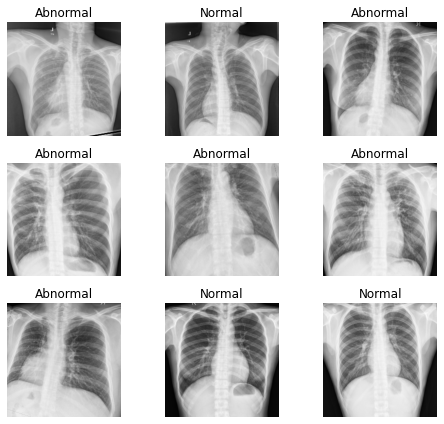

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
data.c,len(data.train_ds), len(data.valid_ds)

(2, 530, 132)

In [22]:
learn = cnn_learner(data, models.mobilenet_v2, metrics=accuracy)

In [23]:
learn.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.178290,0.790977,0.545455,01:47
1,1.123765,0.737009,0.568182,01:47
2,1.009240,0.715419,0.681818,01:47
3,0.975852,0.781586,0.643939,01:47
4,0.932798,0.732641,0.696970,01:49


In [24]:
learn.save('stage-1')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

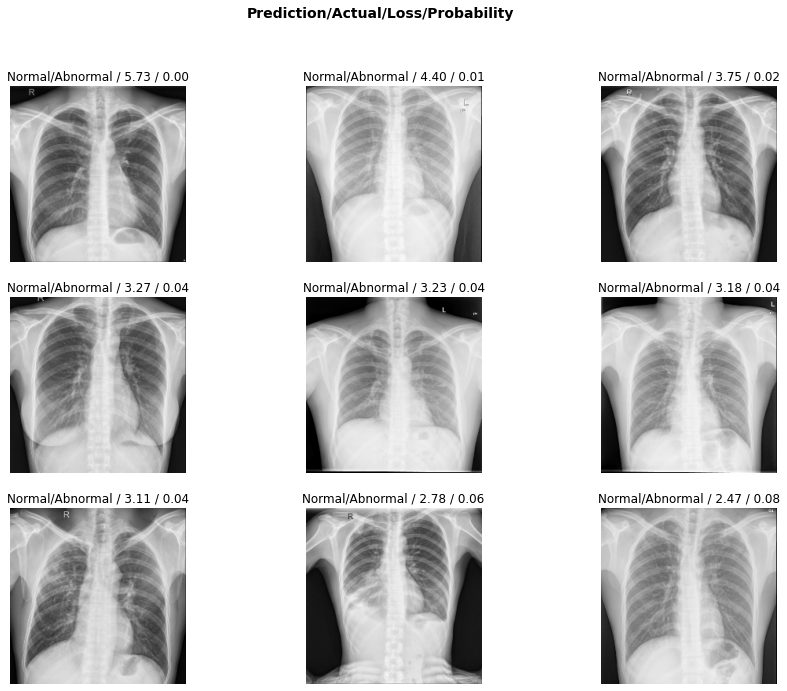

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


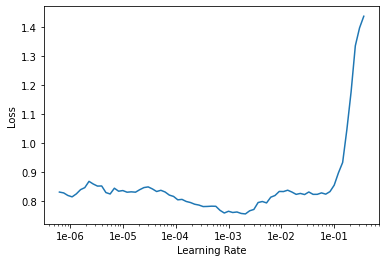

In [29]:
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.801222,0.564433,0.757576,01:49
1,0.762600,1.002340,0.704545,01:46
2,0.757005,0.697223,0.772727,01:49
3,0.694837,0.604783,0.787879,01:46
4,0.673242,0.552454,0.818182,01:49


In [31]:
learn.save('stage-2', return_path=True)

PosixPath('/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/models/stage-2.pth')

In [32]:
learn.unfreeze()
learn.fit_one_cycle(10,max_lr=slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.678150,0.503417,0.818182,01:46
1,0.663200,0.422721,0.848485,01:48
2,0.612019,0.504681,0.825758,01:48
3,0.598964,0.566769,0.863636,01:49
4,0.608504,0.450492,0.848485,01:48
5,0.607942,0.410765,0.863636,01:49
6,0.582657,0.427045,0.856061,01:48
7,0.552050,0.411203,0.863636,01:47
8,0.520950,0.395126,0.871212,01:51
9,0.497160,0.401652,0.863636,01:47


In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


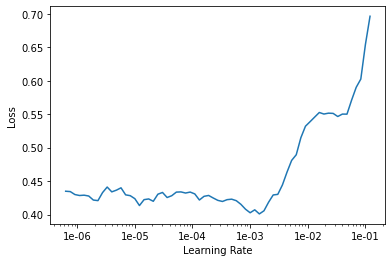

In [34]:
learn.recorder.plot()

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

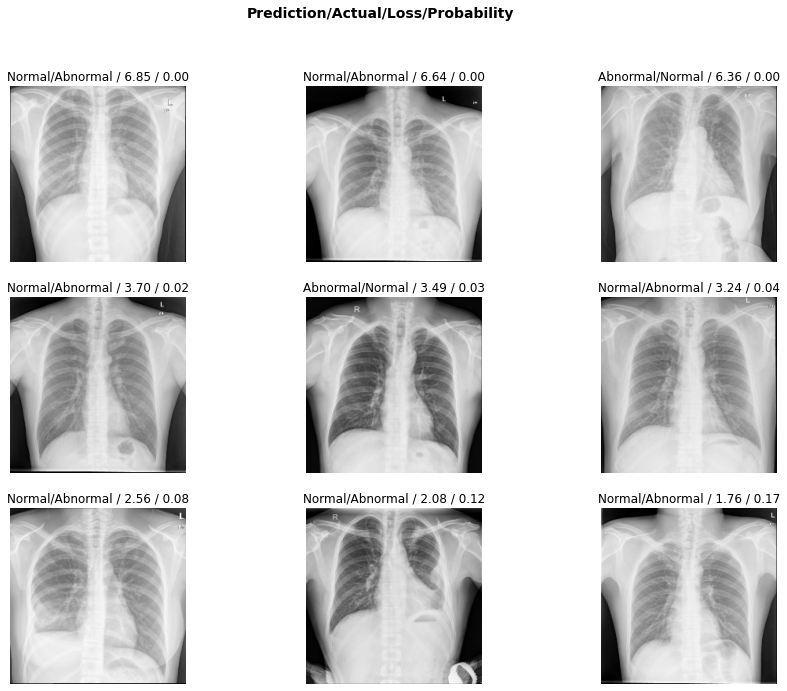

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
learn.export(file="/content/mobile_net_v2.pkl")

In [40]:
path=learn.path
print(path)

/content/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png
